Ref: https://www.joinquant.com/post/7924

本节以 玻璃数据集 为例。此数据集记录了玻璃的化学成分，以及该玻璃的类别。
这是一个多元分类问题。
## 玻璃数据集的读取

In [2]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import numpy as np

In [3]:
import pandas as pd

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
df = pd.read_csv(target_url, header=None, prefix="V")
df.columns = ['Id','RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
df = df.set_index("Id")

print("数据集规模：",df.shape )
print("\n数据集数据类型：\n",df.get_dtype_counts() )
print('\n数据集头5条数据：\n',df.head() )
print('\n数据集描述：\n', df.describe() )

数据集规模： (214, 10)

数据集数据类型：
 float64    9
int64      1
dtype: int64

数据集头5条数据：
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
Id                                                               
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

数据集描述：
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    

## 绘制标准化后的箱线图
此图的显示有相当数量的异常点（和前面的例子相比较）, 导致这个情况的原因有：
- 这是一个分类问题，不需要属性值和类别之间的连续性；
- 也不能期望属性值之间的连续性；
- 这个数据集的数据是非平衡的，成员最多的类有76个样本，而成员最少的类仅有6个样本。

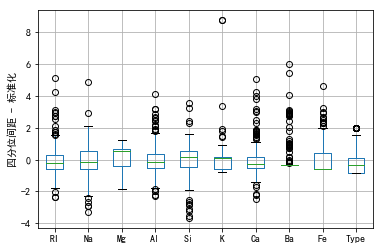

In [5]:
import matplotlib.pyplot as plt

((df - df.mean()) / df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

## 平行坐标图
由图中结果发现，深蓝线聚集度比较好，但经常处于某些属性的边缘；棕色的线聚集度也不错，并且基本处于中心附近。



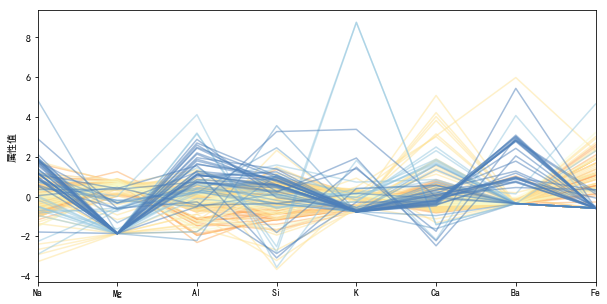

In [6]:
_lim = (df.shape[1]-1)

_df = (df-df.mean())/df.std()
_xs = _df.iloc[:,_lim] #/7.0
_xs = 1.0/(1.0+np.exp(-_xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]): 
    _df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs.iloc[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

## 相关性热图
本例的相关性热图表明：属性之间大部分是弱相关。

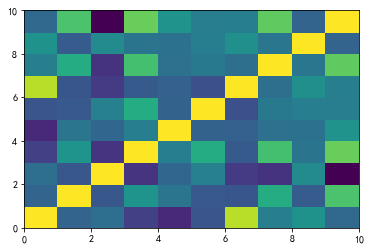

In [8]:
plt.pcolor(df.corr())
plt.show()